# Homework 4 (Deep Neural Network)
* 截止日期：2020/12/15 18:00前（當天上課前）
* 繳交格式：  
        | --HW4_學號_姓名.zip  
            |-- Hw4_學號_姓名.ipynb
* 繳交檔案時請將debug、紀錄或測試用的檔案刪除(如：.ipynb_checkpoints)
* 請將輸出結果儲存，以便作業檢查
* 若有參考書面或網路資訊，請附上書名或連結，沒付上參考資料者視同剽竊，本作業以0分記
* 請使用`markdown`區塊描述作法或填寫問題

## Homework 4-1 : 實作卷積層與池化層(2維圖片/矩陣處理)
  1. 請將所有有含問號`?`的函式補齊，使程式能夠正常運作
      
      > `feature_map`、`conv2d`、`maxpooling2d`
  2. 
      > 請將測試圖丟進去`conv2d`、`maxpooling2d`中，並顯示結果

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import math
import cv2

In [2]:
img = cv2.imread("cat_meme.png",cv2.IMREAD_GRAYSCALE)

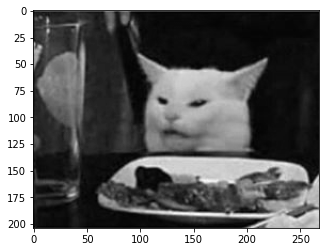

In [3]:
plt.imshow(img, cmap=plt.cm.gray)
plt.show()

In [4]:
print(img.shape)

(204, 268)


### Part 1

 請將所有有含問號?的函式補齊，使程式能夠正常運作

In [5]:
#計算feature_map size
def feature_map(w,h,p,ks,s):
    new_w = math.floor((w+2*p-ks)/s)+1 #計算新的width
    new_h = math.floor((h+2*p-ks)/s)+1 #計算新的height
    return new_w,new_h

In [6]:
#卷積層
#stride = 1
def conv2d(pic_array,conv_filter):
    result = []  #儲存最後輸出的結果
    stride = 1
    ##
    #計算卷積
    
    for h in range(1,(pic_array.shape[0]-1),stride):
        for w in range(1,(pic_array.shape[1]-1),stride):
            ##
            pre_result = 0
            for x in range(conv_filter.shape[0]):
                for y in range(conv_filter.shape[1]):
                    pre_result += conv_filter[x][y]*pic_array[h+x-1][w+y-1]
            if(pre_result < 0):
                pre_result = -pre_result
            result.append(int(pre_result))
            ##
    
    new_w,new_h = feature_map(pic_array.shape[0],pic_array.shape[1],0,conv_filter.shape[0],1)
    
    #將陣列轉回2維
    result = np.array(result).reshape(new_w,new_h)
    result = result.astype('uint8')
    return result

In [7]:
#池化層
#pooling filter 一律為正方形
#
def maxpooling2d(pic_array,pooling_filter_width):
    result = []  #儲存最後輸出的結果
    stride = pooling_filter_width #將stride = pooling size
    ##
    #計算池化
    
    for h in range(0,pic_array.shape[0]-1,stride):
        for w in range(0,pic_array.shape[1]-1,stride):
            ##
            max_value = 0
            for x in range(pooling_filter_width):
                for y in range(pooling_filter_width):
                    if(max_value < pic_array[h+x][w+y]):
                        max_value = pic_array[h+x][w+y]
            result.append(max_value)
            
    ##
    new_w,new_h = feature_map(pic_array.shape[0],pic_array.shape[1],0,pooling_filter_width,stride)
    
    #將陣列轉回2維
    result = np.array(result).reshape(new_w,new_h)
    result = result.astype('uint8')
    return result

### Part 2

請將測試圖丟進去`conv2d`、`maxpooling2d`中，並顯示圖片與shape

1.卷積結果示意圖
![avatar][base64conv2d]

2.max pooling結果示意圖
![avatar][base64maxpooling2d]

[base64maxpooling2d]: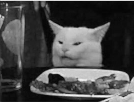
[base64conv2d]: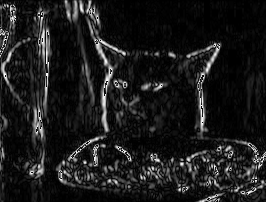

#### Conv2d

In [8]:
#請勿修改此kernel
conv_filter = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])

In [9]:
con = conv2d(img,conv_filter)

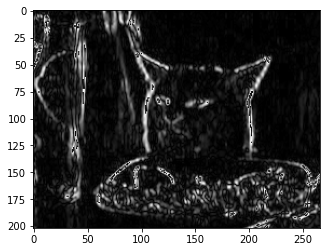

In [10]:
plt.imshow(con, cmap=plt.cm.gray)
plt.show()

In [11]:
print(con.shape)

(202, 266)


#### MaxPooling2d

In [12]:
max_pool = maxpooling2d(img,2)

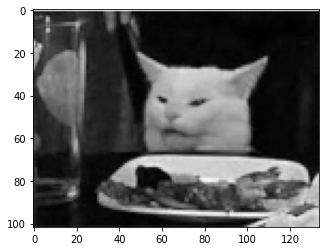

In [13]:
plt.imshow(max_pool, cmap=plt.cm.gray)
plt.show()

In [14]:
print(max_pool.shape)

(102, 134)


## Homework 4-2 : CNN with Keras
 作業說明：
 >作業4-2使用[Kaggle Dogs vs. Cats ](https://www.kaggle.com/c/dogs-vs-cats/overview) 所提供的資料集，本次作業中只會用到test1.zip，裡面存有總共25000張貓狗的照片，運用這些照片進行CNN貓狗分類器。

### Part 0 讀取檔案
已經幫各位寫好讀檔方式了，如果覺得讀檔速度太慢，也歡迎修改讀檔演算法

**以下的寫法為在colab中執行，且僅上傳壓縮檔**

* x 存圖片
* y 存label

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import zipfile

In [ ]:
# from google drive import files
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
PATH = "drive/My Drive/AI微課程/2 | 作業/Hw4/"

In [6]:
zf = zipfile.ZipFile(PATH+"train.zip", 'r') #讀取壓縮檔
zf.extractall() #解壓縮檔

In [8]:
PATH = "train/"

In [ ]:
filenames = os.listdir(PATH)

In [ ]:
len(filenames)

In [ ]:
x = []
y = []

In [ ]:
def create_dataset(x,y):
    timer = 0
    print("當前讀取進度: ")
    for name in filenames:
        img = cv2.imread(PATH+name)
        img = cv2.resize(img,(128,128))
        x.append(img)
        y.append(name.split('.')[0])    
        timer +=1
        
        print("\r{:2.1%}".format(timer / len(filenames)), end="")
    
    print("\n\nFinish")

In [ ]:
create_dataset(x,y)

In [93]:
x = np.array(x)
y = np.array(y)

In [ ]:
# 檢查是否有成功讀取及label
import random
index = random.randint(1,len(y))
plt.imshow(x[index])
plt.show()
print("label: "+y[index])

### Part 1 資料分析與前處理

請在此區塊後使用**一個或多個區塊**進行資料分析與前處理，項目**至少**包含：

- 將y進行one-hot encoding 或 label encoding
- 繪製直方圖查看貓狗數量分布
- 將x中的每張圖resize到相同大小
- 分割訓練與測試資料

其他可額外增加的項目：

- 其他資料視覺化
- 其他


#### 繪製數值資料的長條圖查看資料分布

In [ ]:
y_count = []
cat = 0
dog = 0
for e in y:
    if(e == 'cat'):
        cat+=1
    else:
        dog+=1
y_count.append(cat)
y_count.append(dog)

In [ ]:
#查看資料分布
x_axis = [0,1]
x_label = ['cat','dog']
color = ['blue','orange']
plt.xticks(x_axis, x_label)
plt.bar(x_axis,y_count,color = color)
plt.title('Label')
plt.show()
print("cat : {}, dog : {}".format(y_count[0],y_count[1]))

#### 將類別資料進行one-hot encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder #Label encoding
from keras.utils import to_categorical #one-hot encoding

In [ ]:
le = LabelEncoder()
y = le.fit_transform(y)
y = to_categorical(y)

#### 分割訓練及測試資料

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.3)

### Part2 模型建構、執行與結果呈現

請在此區塊後使用**一個或多個區塊**進行CNN模型訓練，**需要**包含以下內容：

- **CNN模型 1**
    - 自行設定模型**超參數**
    - 利用`summary()`顯示模型架構
- **CNN模型 2**
    - 利用keras內建的CNN model
    - 利用`summary()`顯示模型架構
<br><br>**以下模型1、2都要**<br><br>
- 計算**準確度（Accuracy）**
    - 使用**訓練**資料進行訓練並輸出**準確度**
- 將**訓練過程**利用畫圖套件視覺化
    - 使用**所有**資料進行訓練的**準確度**變化繪製準確度變化圖
    - 使用**所有**資料進行訓練的**Loss**變化繪製損失率變化圖
- 檢驗訓練結果
    - 評估測試資料

#### CNN模型 1

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation,BatchNormalization
from keras.callbacks import EarlyStopping

#建立CNN
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax')) 

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

#### CNN模型 2

In [ ]:
from keras.applications import VGG16

model_vgg = Sequential()
model_vgg.add(VGG16(weights = 'imagenet',include_top = False,input_shape = (128,128,3)))
model_vgg.add(Flatten())
model_vgg.add(Dense(units = 4096,activation = 'relu'))
model_vgg.add(Dense(units = 4096,activation = 'relu'))
model_vgg.add(Dense(units = 2,activation = 'softmax'))
model_vgg.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model_vgg.summary()

#### 計算準確度（Accuracy）

In [ ]:
history = model.fit(train_x, train_y,       
          epochs = 20,          
          batch_size = 32,          
          verbose = 1 ) 
train_acc_all = model.evaluate(train_x,train_y)
print(('model 1 train accuracy: {}').format(train_acc_all[1]))      # 輸出全部訓練準確度                              


In [ ]:
history_vgg = model_vgg.fit(train_x, train_y,       
          epochs = 20,          
          batch_size = 32,          
          verbose = 1 ) 
vgg_train_acc_all = model_vgg.evaluate(train_x,train_y)
print(('model 1 train accuracy: {}').format(vgg_train_acc_all[1]))      # 輸出全部訓練準確度     

#### 將**訓練過程**利用畫圖套件視覺化

In [ ]:
#model 1 
# 訓練過程圖 
plt.subplot(211)

plt.plot(history.history['accuracy'])
plt.ylabel("accurary")
plt.title("accurary history")
plt.legend(['train_acc'],loc='upper left')

plt.subplot(212)

plt.plot(history.history['loss'])
plt.ylabel("loss")
plt.title("loss history")
plt.legend(['train_loss'],loc='upper left')
plt.xlabel("epoch")

plt.tight_layout()
plt.show()

In [ ]:
#model 2
# 訓練過程圖 
plt.subplot(211)

plt.plot(history_vgg.history['accuracy'])
plt.ylabel("accurary")
plt.title("accurary history")
plt.legend(['train_acc'],loc='upper left')

plt.subplot(212)

plt.plot(history_vgg.history['loss'])
plt.ylabel("loss")
plt.title("loss history")
plt.legend(['train_loss'],loc='upper left')
plt.xlabel("epoch")

plt.tight_layout()
plt.show()

#### 檢驗訓練結果

In [ ]:
scores = model.evaluate(test_x, test_y)
print("loss =",scores[0],",acc = ",scores[1])

In [ ]:
vgg_scores = model_vgg.evaluate(test_x, test_y)
print("loss =",vgg_scores[0],",acc = ",vgg_scores[1])